In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [11]:
with open('evp/2024-12-20_Viscoplastic_PC1D_process1_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [12]:
E_bar = 1/np.mean(1/data['youngs_modulus'], axis=1, keepdims=True)

In [13]:
s_pred = np.zeros(data['stress'].shape)

In [14]:
xi = np.zeros((1000, 5001, 1))
dt = 1/ 5000
for i in range(data['stress'].shape[1]-1):
    increment = np.mean(E_bar**data['rate_exponent']*data['rate_constant']*np.abs(data['strain'][:,i] - xi[:,i])**data['rate_exponent']*data['yield_stress']**(-data['rate_exponent']), axis=1, keepdims=True)
    xi[:,i+1] = xi[:,i] + dt*np.sign(data['strain'][:,i] - xi[:,i])*increment
    s_pred[:,i+1] = E_bar*(data['strain'][:,i+1] - xi[:,i+1])

In [15]:
error = np.mean((s_pred - data['stress'])**2)


In [17]:
dt, error

(0.0002, 8.417327141135792e-07)

In [6]:
import util as util
import m_evp as m_evp
import importlib
util = importlib.reload(util)
m_evp = importlib.reload(m_evp)

In [18]:
dataset = util.ViscoplasticDataset('evp/2024-12-20_Viscoplastic_PC1D_process1_data.pkl', 1)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
evp_model = m_evp.ViscoplasticMaterialModel(dt=0.0002)

In [19]:
for x,y in dataloader:
    e, E, Y, n, edot_0, = x
    
    
    y_pred,_ = evp_model(e, E, Y, n, edot_0)
    
    break

In [23]:
e.shape, y_pred.shape

AttributeError: 'list' object has no attribute 'shape'

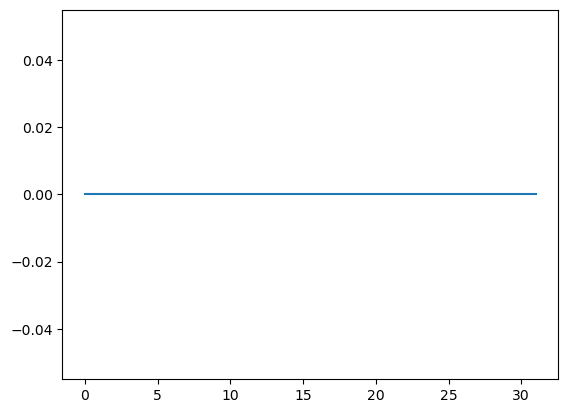

In [21]:
plt.plot(y_pred[0].detach().numpy())
# plt.plot(y[0].detach().numpy())